In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score
import warnings 
warnings.filterwarnings("ignore")

In [23]:
from nltk.stem import PorterStemmer   #reduceing inflection
from nltk.tokenize import word_tokenize   # word tokenization
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer    # for vectors
from gensim.models import Word2Vec   #for vectors

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
data.shape

(20800, 5)

In [6]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
data.fillna(" ",inplace=True)

In [8]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
data["label"].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

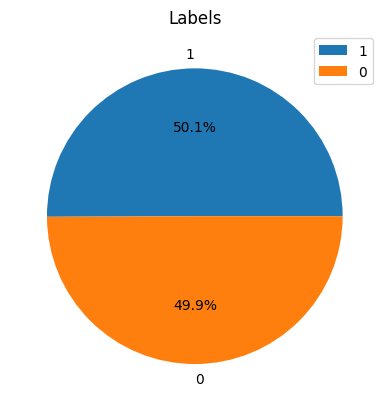

In [10]:
plt.pie(data["label"].value_counts(),autopct="%0.01f%%",labels=[1,0])
plt.legend()
plt.title("Labels")
plt.show()
# From the plot we can declare that the data is labelled

In [11]:
data["content"] = data["author"]+" "+data["title"]

In [12]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [13]:
data.drop(columns=["id","title","author","text"],inplace=True)

In [14]:
data.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re
nltk.download('wordnet')
nltk.download("stopwords")

stopword= stopwords.words("english")



def convert(text_series):
    # Ensure input is a Pandas Series
    if isinstance(text_series, list):
        text_series = pd.Series(text_series)
    return text_series.astype(str).apply(process_text)

def process_text(text):
    wn = WordNetLemmatizer()
    stopword = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z"]', " ", text) 
    text = text.lower()
    text = " ".join(wn.lemmatize(word) for word in text.split() if word not in stopword)
    return text

def to_dense(x):
    return x.toarray()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hasee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Builiding Machine Learning Model

# Using Pipline and FunctionTransformer

In [104]:
from text_processing import convert 

In [16]:
data.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [28]:
x=data["content"]
y =data["label"] 

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

## Pipeline For Random Forest Classifier

In [28]:
rf_pipe = Pipeline([
    ("text_claeaning",FunctionTransformer(convert)),
    ("text-vector",TfidfVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
                ])

In [34]:
rf_pipe.fit(x_train,y_train)
y_pred = rf_pipe.predict(x_test)
print("acuracy score is :",accuracy_score(y_pred,y_test))
print("precision score is :",precision_score(y_pred,y_test))
print("cross val score :",cross_val_score(rf_pipe,x_train,y_train,cv=5,scoring="accuracy"))

acuracy score is : 0.9911057692307692
precision score is : 0.9930966469428008
cross val score : [0.99308894 0.99338942 0.99459135 0.98828125 0.99429087]


## Pipeline For GaussianNaivebayes

In [35]:
gnb_pipe = Pipeline([
    ("text_cleaning",FunctionTransformer(convert)),
    ("text_vectorization",TfidfVectorizer()),
    ("to_dense",FunctionTransformer(to_dense)),
    ("classifier",GaussianNB())
])

In [36]:
gnb_pipe.fit(x_train,y_train)
y_pred = gnb_pipe.predict(x_test)
print("accuracy score with GaussianNB :",accuracy_score(y_pred,y_test))

accuracy score with GaussianNB : 0.7997596153846154


In [37]:
print("Cross val score :",cross_val_score(gnb_pipe,x_train,y_train,cv=5,scoring="accuracy").mean())

Cross val score : 0.7951923076923076


## Exporting Pipeline

In [38]:
import pickle

In [41]:
with open("rf_pipeline.pkl", "wb") as f:
    pickle.dump(rf_pipe, f)

with open("gnb_pipeline.pkl","wb") as f:
    pickle.dump(gnb_pipe,f)